In [772]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

In [773]:
df = pd.read_csv("Churn_Modelling.csv")

In [774]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data PreProcessing

In [775]:
df.shape

(10000, 14)

In [776]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [777]:
df.isna().sum() #no empty value in the dataset

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Data Visualization


In [778]:
left_customers = (df['Exited'] == 1).sum()
retain_customers = (df['Exited'] == 0).sum()

In [779]:
fig = px.bar(x = ['Left = 1','Retain = 0'],y = [left_customers,retain_customers],title="Customer Retentions")
fig.update_xaxes(title_text="Exited")
fig.update_yaxes(title_text="Counts")

In [780]:
correlation_matrix = df.corr().round(2)
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.index.tolist(),
    colorscale='Viridis', 
)
fig.update_layout(
    title='Correlation Heatmap',
    xaxis=dict(title='X-Axis Labels'),
    yaxis=dict(title='Y-Axis Labels'),
)

fig.show()


C:\Users\ishug\AppData\Local\Temp\ipykernel_17912\2885834617.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



From the Heat Map Age and Balance highly correlated to the customer exit
Active member are highly negative correlated to the customer exit so it doesn't make any significant change while predicting the churn


Feature Selection

In [781]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [782]:
x = df.drop(['RowNumber','CustomerId','Surname','Exited'],axis='columns')
y =df['Exited']

In [783]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [784]:
pd.DataFrame(y).head()

,Exited
0,1
1,0
2,1
3,0
4,0


Encoding Categorical Value

In [785]:
#x = pd.get_dummies(x,columns=['Gender'])

In [786]:
#x.tail()

In [787]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
columns_to_encode = [1, 2]
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),columns_to_encode)],remainder='passthrough')
x = ct.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,1.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,1.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,1.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,1.0,0.0,0.0,0.0,1.0,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,1.0,0.0,0.0,1.0,0.0,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,0.0,1.0,0.0,0.0,1.0,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


Splitting the features into test and train

In [788]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [789]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,1.0,686.0,32.0,6.0,0.00,2.0,1.0,1.0,179093.26
1,0.0,1.0,0.0,0.0,1.0,632.0,42.0,4.0,119624.60,2.0,1.0,1.0,195978.86
2,0.0,0.0,1.0,0.0,1.0,559.0,24.0,3.0,114739.92,1.0,1.0,0.0,85891.02
3,1.0,0.0,0.0,1.0,0.0,561.0,27.0,9.0,135637.00,1.0,1.0,0.0,153080.40
4,1.0,0.0,0.0,0.0,1.0,517.0,56.0,9.0,142147.32,1.0,0.0,0.0,39488.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.0,0.0,0.0,0.0,1.0,768.0,54.0,8.0,69712.74,1.0,1.0,1.0,69381.05
7996,1.0,0.0,0.0,1.0,0.0,682.0,58.0,1.0,0.00,1.0,1.0,1.0,706.50
7997,1.0,0.0,0.0,1.0,0.0,735.0,38.0,1.0,0.00,3.0,0.0,0.0,92220.12
7998,1.0,0.0,0.0,0.0,1.0,667.0,43.0,8.0,190227.46,1.0,1.0,0.0,97508.04


In [790]:
pd.DataFrame(y_train)

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1
...,...
5734,0
5191,0
5390,1
860,1


In [791]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,596.0,32.0,3.0,96709.07,2.0,0.0,0.0,41788.37
1,1.0,0.0,0.0,0.0,1.0,623.0,43.0,1.0,0.00,2.0,1.0,1.0,146379.30
2,0.0,0.0,1.0,1.0,0.0,601.0,44.0,4.0,0.00,2.0,1.0,0.0,58561.31
3,0.0,1.0,0.0,0.0,1.0,506.0,59.0,8.0,119152.10,2.0,1.0,1.0,170679.74
4,0.0,0.0,1.0,1.0,0.0,560.0,27.0,7.0,124995.98,1.0,1.0,1.0,114669.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,1.0,0.0,1.0,0.0,602.0,53.0,5.0,98268.84,1.0,0.0,1.0,45038.29
1996,1.0,0.0,0.0,0.0,1.0,609.0,25.0,10.0,0.00,1.0,0.0,1.0,109895.16
1997,1.0,0.0,0.0,1.0,0.0,730.0,47.0,7.0,0.00,1.0,1.0,0.0,33373.26
1998,1.0,0.0,0.0,0.0,1.0,692.0,29.0,4.0,0.00,1.0,1.0,0.0,76755.99


In [792]:
pd.DataFrame(y_train)

,Exited
9254,0
1561,0
1670,1
6087,1
6669,1
...,...
5734,0
5191,0
5390,1
860,1


In [793]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [794]:

y_pred = lr.predict(x_test)
pd.DataFrame(y_pred)

,0
0,0
1,0
2,0
3,1
4,0
...,...
1995,0
1996,0
1997,0
1998,0


In [795]:
pd.DataFrame(y_test)

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
6412,1
8285,0
7853,1
1095,1


In [796]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [797]:
print(f"Accuracy: {accuracy*100:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 80.05
Precision: 0.45
Recall: 0.07
F1-Score: 0.12
ROC AUC: 0.53


In [798]:
cnf = confusion_matrix(y_test,y_pred)

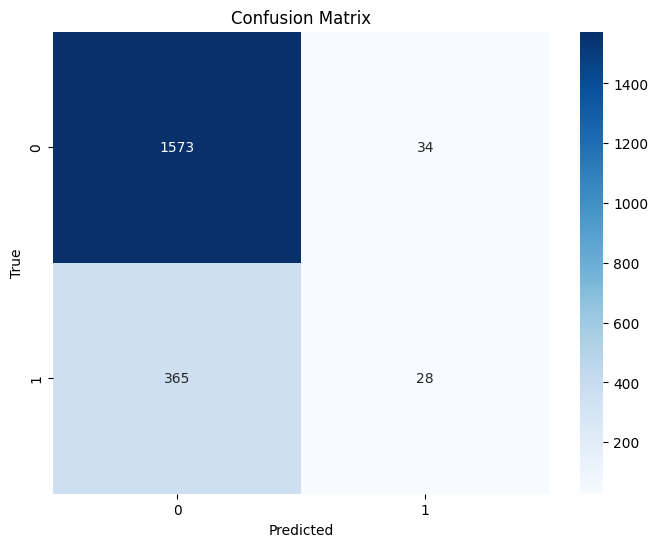

In [799]:
class_labels = ["0", "1"]
plt.figure(figsize=(8, 6))
sns.heatmap(cnf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [800]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [801]:
rf_pred = rf.predict(x_test)
rf_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [802]:
rfaccuracy = accuracy_score(y_test, rf_pred)
rfprecision = precision_score(y_test, rf_pred)
rfrecall = recall_score(y_test, rf_pred)
rff1 = f1_score(y_test, rf_pred)
rfroc_auc = roc_auc_score(y_test, rf_pred)

In [803]:
print(f"Accuracy: {rfaccuracy*100:.2f}")
print(f"Precision: {rfprecision:.2f}")
print(f"Recall: {rfrecall:.2f}")
print(f"F1-Score: {rff1:.2f}")
print(f"ROC AUC: {rfroc_auc:.2f}")

Accuracy: 86.65
Precision: 0.75
Recall: 0.48
F1-Score: 0.58
ROC AUC: 0.72


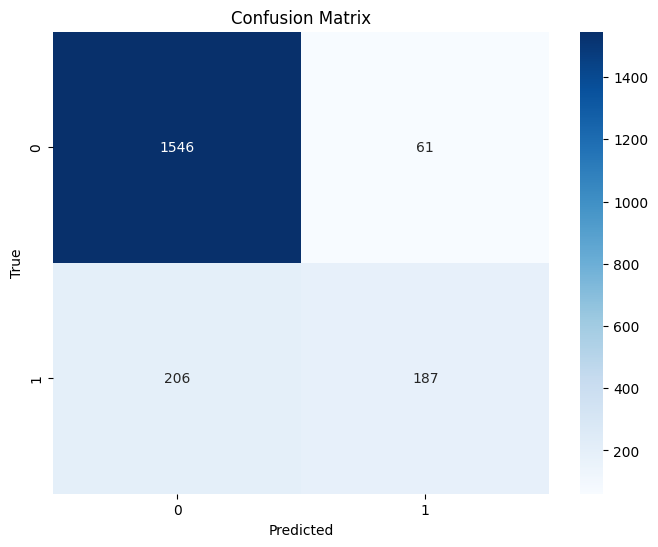

In [804]:
rfcnf = confusion_matrix(y_test,rf_pred)
class_labels = ["0", "1"]
plt.figure(figsize=(8, 6))
sns.heatmap(rfcnf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [805]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [806]:
gb_pred=gb.predict(x_test)

In [807]:
acc = accuracy_score(y_test,gb_pred)
gbcnf = confusion_matrix(y_test,gb_pred)

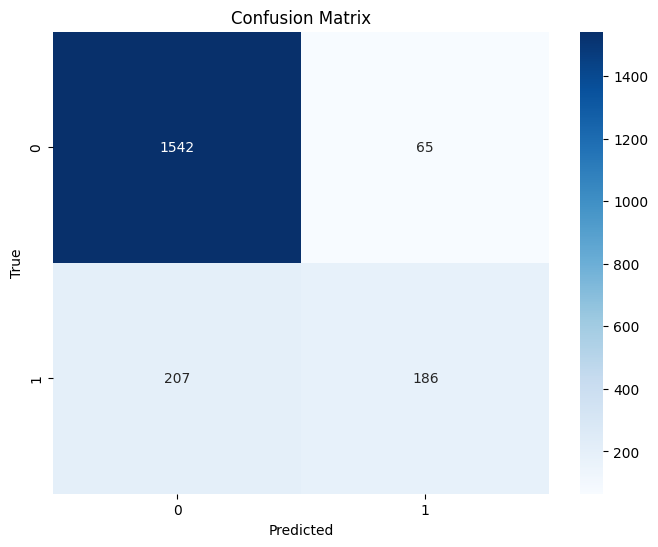

In [808]:
class_labels = ["0", "1"]
plt.figure(figsize=(8, 6))
sns.heatmap(gbcnf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

From The Above Random Forest have the Greatest Accuracy i.e 86.66

In [809]:
#saving the Random Forest model in file so we don't need to re-run the model another time
import skops.io as sco 
sco.dump(rf,"Chrun_Model")

In [810]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [811]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [812]:
#creating GUI for the Model
#GUI have the feature NAME,Creditscore,location,Gender,Age,Tenure,CurrentBalance,Noofproduct,has credit card,is active meme,salary
import streamlit as st
st.title("CUSTOMER CHRUN PREDCITION")

cname =  st.text_area("Customer Name: ")
ccredit =st.text_area("Your Credit Score: ")
loc = ['France','Spain','Germany']
cloc = st.selectbox("Select Your Location",loc)
gender=['Male', 'Female' ]
cgender = st.selectbox("Gender",gender)



2023-09-30 18:30:10.276 
  command:

    streamlit run C:\Users\ishug\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
